In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import datetime
import sys
sys.path.append('../')
from detect_peaks import detect_peaks
sns.set(style="darkgrid")

label_dict = {0:'not_walking',
              1:'walking'}
labels = label_dict.keys()
file_path = "../../data/data_PD/all_data.csv"
saveto = "../../../data/data_PD/snippets/"
if not os.path.exists(saveto):
    os.makedirs(saveto)

for nr in labels:
    if not os.path.exists(saveto + label_dict[nr]):
        os.makedirs(saveto + label_dict[nr])

interested_cols = [ 'AccX', 'AccY', 'AccZ', 'GyroX','GyroY', 'GyroZ']

In [7]:
df = pd.read_csv(file_path, index_col='date', parse_dates=True)
df.drop(columns=['ROWID'], inplace=True)
df.head()

,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,label
date,,,,,,,
2016-06-20 07:01:00.004,-0.842773,-0.278076,-0.069824,4.42073,-0.853659,17.6829,laying
2016-06-20 07:01:00.021,-0.868164,-0.287354,-0.094238,-2.83537,-9.725610,44.8171,laying
2016-06-20 07:01:00.036,-0.945068,-0.374756,-0.151367,-6.85976,-15.000000,58.0183,laying
2016-06-20 07:01:00.038,-1.126950,-0.564697,-0.129883,-14.60370,-24.481700,83.8415,laying
2016-06-20 07:01:00.054,-1.226810,-0.617432,-0.121582,-14.60370,-24.481700,83.8415,laying


In [8]:
df.columns =interested_cols+['label']

In [9]:
df = df.sort_index(ascending = True)
df = df.drop_duplicates()
df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,label
date,,,,,,,
2016-06-20 07:01:00.004,-0.842773,-0.278076,-0.069824,4.42073,-0.853659,17.6829,laying
2016-06-20 07:01:00.021,-0.868164,-0.287354,-0.094238,-2.83537,-9.725610,44.8171,laying
2016-06-20 07:01:00.036,-0.945068,-0.374756,-0.151367,-6.85976,-15.000000,58.0183,laying
2016-06-20 07:01:00.038,-1.126950,-0.564697,-0.129883,-14.60370,-24.481700,83.8415,laying
2016-06-20 07:01:00.054,-1.226810,-0.617432,-0.121582,-14.60370,-24.481700,83.8415,laying


In [10]:
def f(x):
    if x =='walking':
        return 1
    elif x in ['laying', 'sitting', 'standing']:
        return 0
    

In [11]:
df['label'] = df['label'].apply(f)

/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


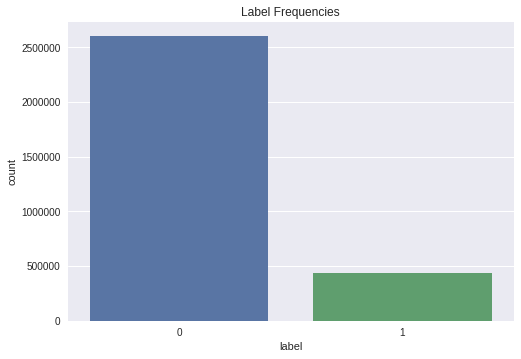

In [12]:
ax = sns.countplot(x="label", data=df)
plt.title('Label Frequencies')
plt.show()

In [13]:
df.sort_index(inplace=True)
df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,label
date,,,,,,,
2016-06-20 07:01:00.004,-0.842773,-0.278076,-0.069824,4.42073,-0.853659,17.6829,0
2016-06-20 07:01:00.021,-0.868164,-0.287354,-0.094238,-2.83537,-9.725610,44.8171,0
2016-06-20 07:01:00.036,-0.945068,-0.374756,-0.151367,-6.85976,-15.000000,58.0183,0
2016-06-20 07:01:00.038,-1.126950,-0.564697,-0.129883,-14.60370,-24.481700,83.8415,0
2016-06-20 07:01:00.054,-1.226810,-0.617432,-0.121582,-14.60370,-24.481700,83.8415,0


In [14]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
def extract_energy_variables(f, psdX):
    
    i_low = find_nearest(f,4.0)
    i_high = find_nearest(f,7.0)
    
    energy_total = np.sum(psdX) 
    energy_interested = np.sum(psdX[i_low : i_high + 1]) 
    max_total = np.max(psdX)
    max_interested = np.max(psdX[i_low : i_high + 1])
    return energy_total,energy_interested, max_total, max_interested
def average_over_axis(df):
    aoa = df[interested_cols].mean(axis = 0)
    aoa.index += '_aoa'
    return aoa
def average_time_elapse(df):
    list_= []
    for col in interested_cols:
        a = df[col].values
        mph = a.mean()
        ind = detect_peaks(a, mph = mph, mpd=20, show=False)
        list_.append(np.diff(ind).mean())
    ate = pd.Series(list_, index=interested_cols)
    ate.index += '_ate'
    return ate
def average_peak_freq(df):
    list_f= []
    for col in interested_cols:
        a = df[col].values
        mph = a.mean()
        ind = detect_peaks(a, mph = mph, mpd=20, show=False)
        list_f.append(len(ind)/a.shape[0])
    apf = pd.Series(list_f, index=interested_cols)
    apf.index += '_apf'
    return apf
def rms_func(df):
    list_= []
    for col in interested_cols:
        a = df[col].values
        rms_temp = np.sqrt(np.mean(a**2))
        list_.append(rms_temp)
    rms = pd.Series(list_, index=interested_cols)
    rms.index += '_rms'
    return rms
def std_func(df):
    list_= []
    for col in interested_cols:
        a = df[col].values
        std_temp = np.std(a)
        list_.append(std_temp)
    std = pd.Series(list_, index=interested_cols)
    std.index += '_std'
    return std
def minmax_func(df):
    list_= []
    for col in interested_cols:
        a = df[col].values
        minmax_temp = np.max(a)-np.min(a)
        list_.append(minmax_temp)
    minmax = pd.Series(list_, index=interested_cols)
    minmax.index += '_minmax'
    return minmax
def cor_func(df):
    a = df[interested_cols[:3]].corr()
    b= df[interested_cols[3:]].corr()
    indexes = ['CorAccXAccY','CorAccXAccZ','CorAccYAccZ', 'CorGyroXGyroY','CorGyroXGyroZ','CorGyroYGyroZ']
    Cor = (a['AccX'][1:]).append(a['AccY'][2:]).append((b['GyroX'][1:]).append(b['GyroY'][2:]))
    corr = pd.Series(Cor.values, indexes)
    corr.index += '_corr'
    return corr

In [16]:
def get_all_features(df, index):
    feature_list = [ 'aoa', 'ate', 'apf', 'rms', 'std', 'minmax', 'cor', 'label']
    feature_func_dict = {'aoa':average_over_axis,
                        'ate': average_time_elapse,
                        'apf':average_peak_freq,
                        'rms':rms_func,
                        'std':std_func,
                        'minimax':minmax_func,
                        'cor':cor_func}

    aoa = average_over_axis(df)
    ate = average_time_elapse(df)
    apf = average_peak_freq(df)
    rms = rms_func(df)
    std = std_func(df)
    minmax = minmax_func(df)
    cor = cor_func(df)
    label = pd.Series(df['label'][0], index=['label'])

    ser_list = [pd.Series(str(index[0]),index=['start']),pd.Series(str(index[1]),index=['end']), aoa, ate,apf, rms,std, minmax, cor, label]
    ser = pd.concat(ser_list)
    if type(index)!=str:
        index = str(index)
    ser.name = index

    return ser


In [ ]:
labels = list(label_dict.keys())
window_size = datetime.timedelta(seconds=2)
window_slide = datetime.timedelta(seconds=1)
samples_count = []
DF = pd.DataFrame()
for l in labels[::-1]:
    df_temp = df[df['label']==l] 
    t = df_temp.index[0]
    end_time = df_temp.index[-1]
    increment = 0
    print("label ",label_dict[l], ' is beeing processed' )
    while(t + datetime.timedelta(seconds=1) < end_time):
        
        t_end = t + window_size
        sensor_data = df_temp.between_time(t.to_pydatetime().time(), t_end.to_pydatetime().time()
                                           ,include_start =True, include_end=False)
        if sensor_data.shape[0]>= 20:
            increment +=1
            ser = get_all_features(sensor_data, index=(t, t_end))
            DF = DF.append(ser, verify_integrity=True)
        t = t+window_slide

('label ', 'walking', ' is beeing processed')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: Mean of empty slice.


('label ', 'not_walking', ' is beeing processed')


In [ ]:
print("Finished")